# SEGMENTAÇÃO DE CLIENTES DE DISTRIBUIDOR ATACADISTA (HIERARCHICAL CLUSTERING)

*O conjunto de dados contém gastos de clientes de um distribuidor atacadista, dividido por categorias de produtos. Ele contém 440 observações e 8 variáveis. Adicionamos uma coluna de data, com valores aleatórios. Dessa, criamos colunas com ano e dias decorridos desde a última compra.*

**Problema de negócio:**

1. Qual o total de gastos dos clientes por tipo de produto?
2. Qual a média de gastos dos clientes por tipo de produto?
3. Qual foi o total de gastos dos clientes nos últimos 30, 60 e 90 dias?
4. Qual foi o total de gastos por categoria de produtos nos últimos 30, 60 e 90 dias?
5. Qual o total de gastos dos clientes por ano?
6. Agrupar clientes(segmentação de mercado).


**Dataset:** https://archive.ics.uci.edu/ml/datasets/wholesale+customers


## 1. CARREGAR PACOTES E IMPORTAR DADOS

In [1]:
# Carregando pacotes
library(tidyverse)
library(lubridate)
library(corrplot)
library(gridExtra)
library(knitr)
library(factoextra)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'g

In [2]:
# Importando os dados
df<- read.csv("Wholesale customers data.csv")

In [3]:
# Sumário dos dados
summary(df)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [4]:
# Visualizar as seis primeiras linhas do dataset
head(df)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [5]:
# Visualizar as seis últimas linhas do dataset
tail(df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,16731,3922,7994,688,2371,838
436,1,3,29703,12051,16027,13135,182,2204
437,1,3,39228,1431,764,4510,93,2346
438,2,3,14531,15488,30243,437,14841,1867
439,1,3,10290,1981,2232,1038,168,2125
440,1,3,2787,1698,2510,65,477,52


In [6]:
# Informações gerais dos dados
glimpse(df)

Rows: 440
Columns: 8
$ Channel          <int> 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,~
$ Region           <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,~
$ Fresh            <int> 12669, 7057, 6353, 13265, 22615, 9413, 12126, 7579, 5~
$ Milk             <int> 9656, 9810, 8808, 1196, 5410, 8259, 3199, 4956, 3648,~
$ Grocery          <int> 7561, 9568, 7684, 4221, 7198, 5126, 6975, 9426, 6192,~
$ Frozen           <int> 214, 1762, 2405, 6404, 3915, 666, 480, 1669, 425, 115~
$ Detergents_Paper <int> 2674, 3293, 3516, 507, 1777, 1795, 3140, 3321, 1716, ~
$ Delicassen       <int> 1338, 1776, 7844, 1788, 5185, 1451, 545, 2566, 750, 2~


In [7]:
# Checando NAs
sapply(df,function(x) sum(is.na(x)))

Channel           Region            Fresh             Milk 
               0                0                0                0 
         Grocery           Frozen Detergents_Paper       Delicassen 
               0                0                0                0

## 2. TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

In [8]:
# Gerando Datas aleatórias
df$Date<-as.Date(x = rdunif(n = 440,
                                 a = as.integer(as.Date("2015-01-01")),
                                 b = as.integer(as.Date("2020-01-01"))),
                origin="1970-01-01")

In [9]:
# Gerando coluna Ano
df$Year<-format(as.Date(df$Date),"%Y")

In [10]:
# Criando coluna dias desde última compra
df$Days_since  = as.numeric(difftime(time1 = "2020-01-01", time2 = df$Date, units = "days"))

In [11]:
# Renomeando variáveis
df<-df %>%
rename(Canal=Channel,Regiao=Region,Frescos=Fresh,Lacteos=Milk,
      Mercearia=Grocery,Congelados=Frozen,Limpeza=Detergents_Paper,
      Delicatessen=Delicassen,Data=Date,Ano=Year,Dias_decorridos=Days_since)

In [12]:
# Visão geral das variáveis
glimpse(df)

Rows: 440
Columns: 11
$ Canal           <int> 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, ~
$ Regiao          <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ~
$ Frescos         <int> 12669, 7057, 6353, 13265, 22615, 9413, 12126, 7579, 59~
$ Lacteos         <int> 9656, 9810, 8808, 1196, 5410, 8259, 3199, 4956, 3648, ~
$ Mercearia       <int> 7561, 9568, 7684, 4221, 7198, 5126, 6975, 9426, 6192, ~
$ Congelados      <int> 214, 1762, 2405, 6404, 3915, 666, 480, 1669, 425, 1159~
$ Limpeza         <int> 2674, 3293, 3516, 507, 1777, 1795, 3140, 3321, 1716, 7~
$ Delicatessen    <int> 1338, 1776, 7844, 1788, 5185, 1451, 545, 2566, 750, 20~
$ Data            <date> 2018-11-08, 2019-04-02, 2017-05-28, 2017-10-28, 2016-~
$ Ano             <chr> "2018", "2019", "2017", "2017", "2016", "2016", "2018"~
$ Dias_decorridos <dbl> 419.0833, 274.0833, 948.0833, 795.0833, 1282.0833, 120~


### 2.1 Plotando Variáveis

In [13]:
# Plotando a variável Frescos
plot1<-df %>%
ggplot(aes(Frescos)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos Frescos", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
     plot.title = element_text(hjust = 0.5))

In [14]:
# Plotando a variável Lacteos
plot2<-df %>%
ggplot(aes(Lacteos)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos Lácteos", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

In [15]:
# Plotando a variável Mercearia
plot3<-df %>%
ggplot(aes(Mercearia)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos de Mercearia", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

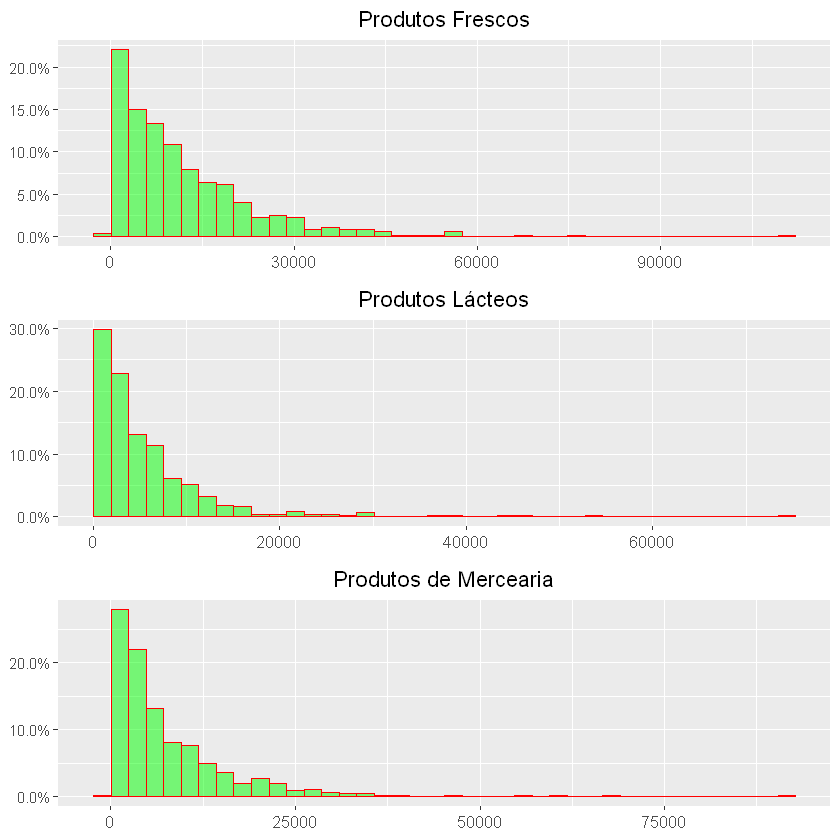

In [16]:
grid.arrange(plot1,plot2,plot3)

In [17]:
# Plotando a variável Congelados
plot4<-df %>%
ggplot(aes(Congelados)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos Congelados", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

In [18]:
# Plotando a variável Limpeza
plot5<-df %>%
ggplot(aes(Limpeza)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos de Limpeza", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

In [19]:
# Plotando a variável Delicatessen
plot6<-df %>%
ggplot(aes(Delicatessen)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Produtos Delicatessen", x=NULL, y=NULL) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

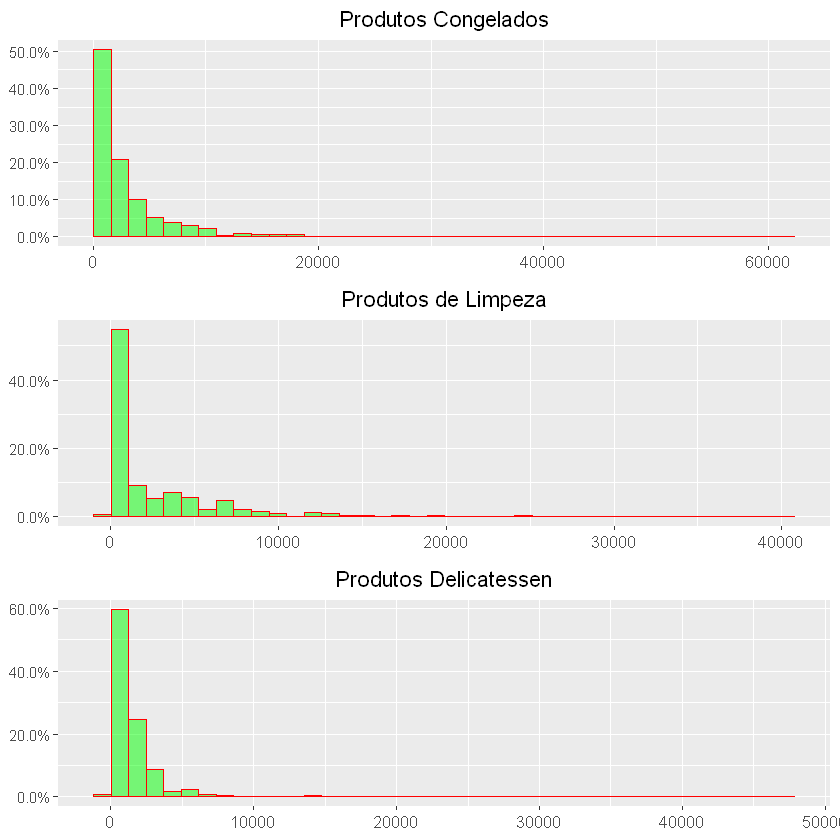

In [20]:
grid.arrange(plot4,plot5,plot6)

In [21]:
# Plotando a variável Canal
plot7<- df %>%
mutate(Canal=factor(Canal,labels=c("Horeca","Varejo"))) %>%
ggplot(aes(Canal,fill=Canal)) +
geom_bar(alpha=.5,show.legend=F,aes(y = (..count..)/sum(..count..))) +
scale_y_continuous(labels=scales::percent) +
labs(x=NULL,y=NULL,title="Tipo de Cliente") +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

In [22]:
# Plotando a variável Regiao
plot8<- df %>%
mutate(Regiao=factor(Regiao,labels=c("Lisboa","Porto","Outra Região"))) %>%
ggplot(aes(Regiao,fill=Regiao)) +
geom_bar(alpha=.5,show.legend=F,aes(y = (..count..)/sum(..count..))) +
scale_y_continuous(labels=scales::percent) +
labs(x=NULL,y=NULL,title="Região do Cliente") +
theme(axis.text.x = element_text(size = 10),
      plot.title = element_text(hjust = 0.5))

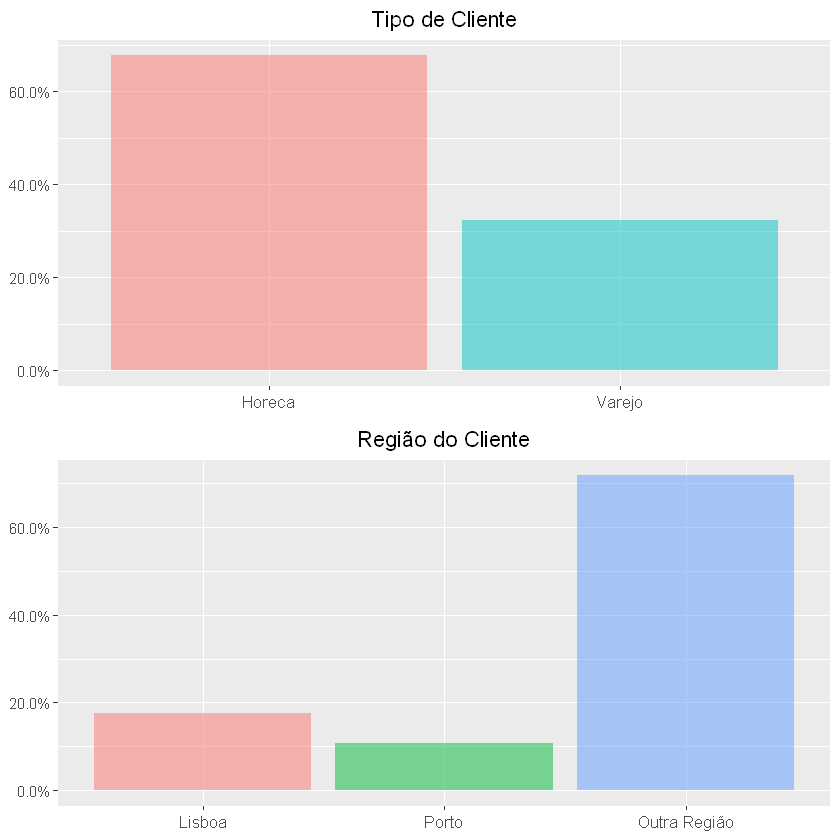

In [23]:
grid.arrange(plot7,plot8)

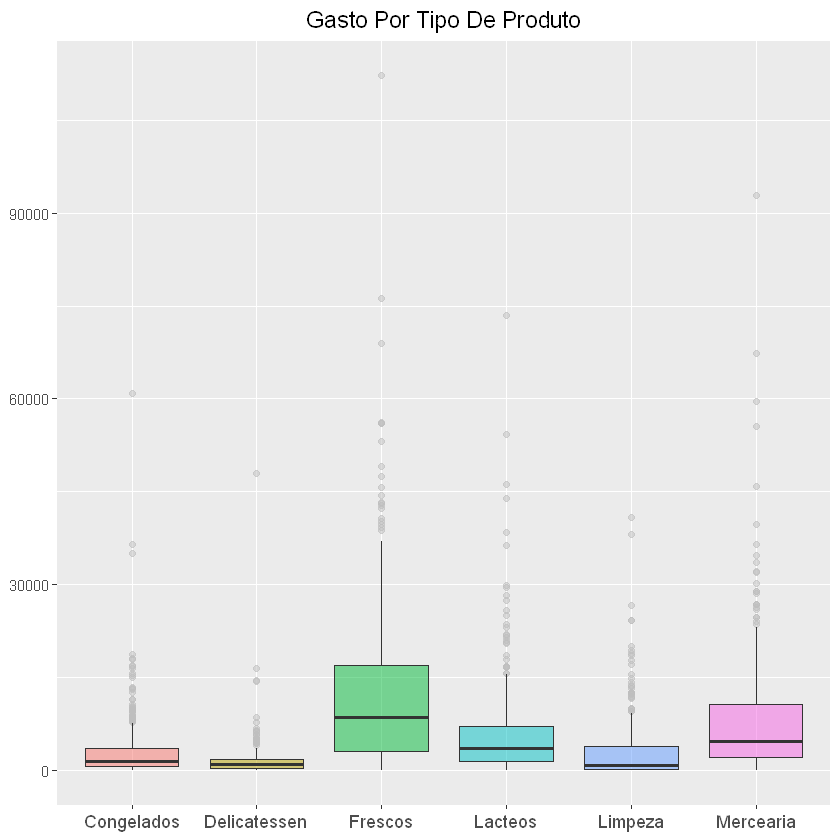

In [24]:
# Plotando gasto por tipo de produto
df %>%
gather("Produto","Gasto",3:8) %>%
ggplot(aes(Produto,Gasto,fill=Produto)) +
geom_boxplot(alpha=.5,show.legend=F,outlier.color="grey") +
labs(title="Gasto Por Tipo De Produto",y=NULL,x=NULL) +
theme(plot.title = element_text(hjust = 0.5,size=14),
     axis.text.x = element_text(size=11))

In [25]:
# Observando outliers na varíavel Frescos
df %>%
arrange(desc(Mercearia)) %>%
head(10)

Canal,Regiao,Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen,Data,Ano,Dias_decorridos
2,3,16117,46197,92780,1026,40827,2944,2018-11-15,2018,412.0833
2,2,8565,4980,67298,131,38102,1215,2017-10-01,2017,822.0833
2,3,35942,38369,59598,3254,26701,2017,2015-05-22,2015,1685.0833
2,3,44466,54259,55571,7782,24171,6465,2019-08-05,2019,149.0833
2,3,85,20959,45828,36,24231,1423,2019-07-26,2019,159.0833
2,1,12119,28326,39694,4736,19410,2870,2018-08-17,2018,502.0833
2,1,2532,16599,36486,179,13308,674,2015-06-06,2015,1670.0833
2,3,22039,8384,34792,42,12591,4430,2018-12-28,2018,369.0833
2,1,6134,23133,33586,6746,18594,5121,2016-06-20,2016,1290.0833
2,3,22925,73498,32114,987,20070,903,2018-02-15,2018,685.0833


In [26]:
# Selecionando variáveis numéricas
df_num<- df %>%
select(Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen)


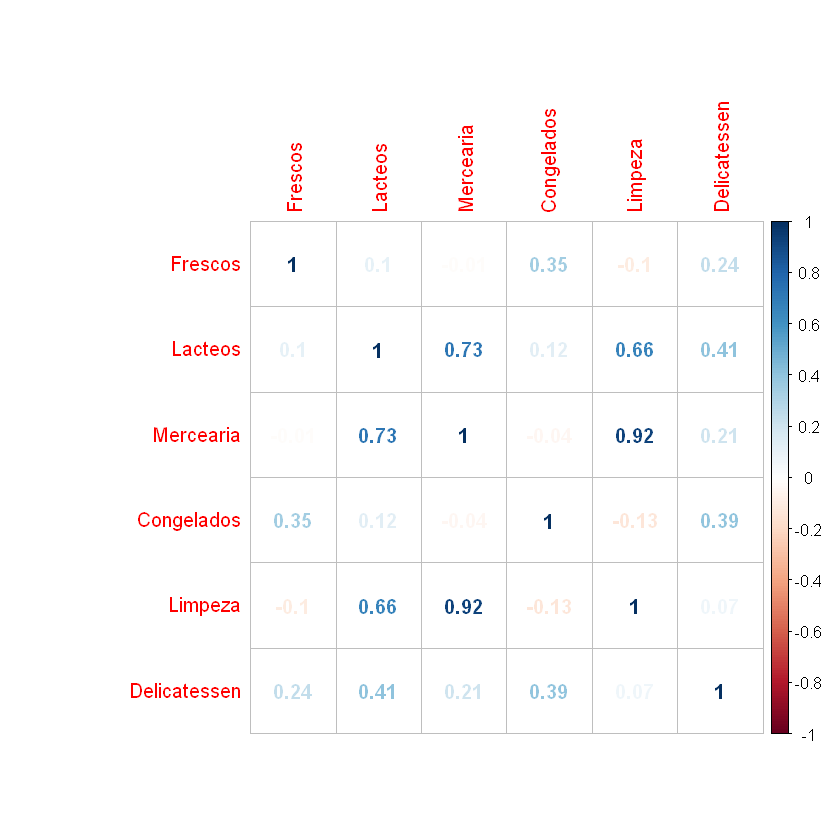

In [27]:
# Gerando Matrix de correlação
corrmatrix <- cor(df_num)
corrplot(corrmatrix, method = 'number')

**Considerações**
* Encontramos outliers em todas as variáveis de nosso conjunto de dados que representam  gastos dos clientes. Isso fica mais nítido quando as unimos em um boxplot. O maior valor pertence a variável gastos com produtos frescos, mas esse maior gasto está correlacionado com um maior gasto em outros tipos de produtos. O mesmo ocorre, quando observamos outros valores outliers. 
<br>
* Há uma forte correlação positiva (0.92) entre o gasto com produtos de limpeza e o gasto com mercearia. Além disso, há uma moderada correlação entre gastos com produtos lácteos e mercearia, assim como entre produtos lácteos e produtos de limpeza, respectivamente 0.73 e 0.66.
* Quase 20% dos clientes são de Lisboa, cerca de 10% são do Porto, porém a grande maioria dos clientes pertencem à outras regiões.
* 2/3 dos clientes são do setor de hotéis, restaurantes e cafés. O restante pertencem ao varejo.

## 3. PROBLEMA DE NEGÓCIO

## 1. Qual o gasto total dos clientes por tipo de produto a cada ano?

In [28]:
# Total de gasto por tipo de produto por ano
tb1<-df %>%
group_by(Ano) %>%
summarize(Frescos=sum(Frescos),Lacteos=sum(Lacteos),Mercearia=sum(Mercearia),
Congelados=sum(Congelados),Limpeza=sum(Limpeza),Delicatessen=sum(Delicatessen))
kable(tb1,caption="Total de Gasto por Tipo de Produto ao Ano")



Table: Total de Gasto por Tipo de Produto ao Ano

|Ano  | Frescos| Lacteos| Mercearia| Congelados| Limpeza| Delicatessen|
|:----|-------:|-------:|---------:|----------:|-------:|------------:|
|2015 |  998964|  512845|    661824|     244738|  230061|       143686|
|2016 | 1019153|  543424|    695482|     292628|  259590|       159205|
|2017 | 1380164|  367093|    567171|     263936|  212037|       126881|
|2018 | 1137647|  715657|    980258|     321417|  367377|       151922|
|2019 |  744203|  411338|    593827|     228931|  198792|        89249|

* Na tabela acima podemos observar o gasto total de cada categoria de produtos por ano de 2015 a 2019.

## 2. Qual a média de gastos dos clientes por tipo de produto a cada ano?

* Primeiro, é importante resaltar que os valores discrepantes impactam a média. 
* Uma estratégia para resolver esse problema seria filtrar os valores a fim de remover outliers. Assim, apresentaremos duas tabelas com a média de gasto por ano. A primeira sem nenhum filtro e a segunda apenas com gastos menores do que 30 mil.

### 2.1 Média de gastos por ano

In [29]:
# Média de gasto por tipo de produto por ano
tb2<-df %>%
group_by(Ano) %>%
summarize(Frescos=mean(Frescos),Lacteos=mean(Lacteos),Mercearia=mean(Mercearia),
Congelados=mean(Congelados),Limpeza=mean(Limpeza),Delicatessen=mean(Delicatessen))
kable(tb2,caption="Média de Gasto por Tipo de Produto ao Ano")



Table: Média de Gasto por Tipo de Produto ao Ano

|Ano  |   Frescos|  Lacteos| Mercearia| Congelados|  Limpeza| Delicatessen|
|:----|---------:|--------:|---------:|----------:|--------:|------------:|
|2015 | 11615.860| 5963.314|  7695.628|   2845.791| 2675.128|     1670.767|
|2016 | 12132.774| 6469.333|  8279.548|   3483.667| 3090.357|     1895.298|
|2017 | 14376.708| 3823.885|  5908.031|   2749.333| 2208.719|     1321.677|
|2018 | 11728.320| 7377.907| 10105.753|   3313.577| 3787.392|     1566.206|
|2019 |  9664.974| 5342.052|  7712.039|   2973.130| 2581.714|     1159.078|

### 2.2 Média de gastos por ano filtrado

In [30]:
# Média de gasto por tipo de produto por ano
tb3<-df %>%
group_by(Ano) %>%
filter(Frescos<30000 & Lacteos<30000 & Mercearia<30000
       & Congelados<30000 & Limpeza <30000 & Delicatessen <30000) %>%
summarize(Frescos=mean(Frescos),Lacteos=mean(Lacteos),Mercearia=mean(Mercearia),
Congelados=mean(Congelados),Limpeza=mean(Limpeza),Delicatessen=mean(Delicatessen))
kable(tb3,caption="Media de Gasto por Tipo de Produto ao Ano c/Filtro")



Table: Media de Gasto por Tipo de Produto ao Ano c/Filtro

|Ano  |   Frescos|  Lacteos| Mercearia| Congelados|  Limpeza| Delicatessen|
|:----|---------:|--------:|---------:|----------:|--------:|------------:|
|2015 | 10290.812| 5067.413|  6579.925|   2873.463| 2252.838|     1488.713|
|2016 |  9424.053| 5440.733|  7619.320|   2774.213| 2897.627|     1144.400|
|2017 | 10519.855| 3950.554|  5419.217|   2661.145| 1969.253|     1151.566|
|2018 |  8511.812| 5684.894|  8310.271|   2072.376| 2956.259|     1370.188|
|2019 |  7007.437| 4356.366|  6596.380|   2400.437| 2078.831|     1063.944|

* Realizamos um filtro para obter valores menores do que 30.000. 
* Claramente observamos a diferença entre valores com e sem filtro. Por exemplo, a média de gastos com produtos frescos em 2015 foi de 11.616 dólares sem filtrar valores e 10.291 dólares utilizando filtro.

## 3. Qual foi o total de gastos dos clientes nos últimos 30, 60 e 90 dias?

### 3.1 Gasto total nos últimas 30 dias

In [31]:
# Total de gastos nos últimos 30 dias
tb4<-df %>%
filter(Dias_decorridos<30) %>%
summarize(Total_de_Gastos=sum(Frescos)+sum(Lacteos)+sum(Mercearia)
          +sum(Congelados)+sum(Limpeza)+sum(Delicatessen))
kable(tb4,caption="Gasto Total nos Últimos 30 Dias")



Table: Gasto Total nos Últimos 30 Dias

| Total_de_Gastos|
|---------------:|
|          222180|

* Total de gasto dos clientes nos últimos 30 dias foi de 222.180 dólares.

### 3.2 Gasto total nos úlimos 60 dias

In [32]:
# Total de gastos nos últimos 60 dias
tb5<-df %>%
filter(Dias_decorridos<60) %>%
summarize(Total_de_Gastos=sum(Frescos)+sum(Lacteos)+sum(Mercearia)
          +sum(Congelados)+sum(Limpeza)+sum(Delicatessen))
kable(tb5,caption="Gasto Total nos Últimos 60 Dias")



Table: Gasto Total nos Últimos 60 Dias

| Total_de_Gastos|
|---------------:|
|          500169|

* Total de gasto dos clientes nos últimos 60 dias foi de 500.169 dólares.

### 3.3 Gasto total nos últimos 90 dias

In [33]:
# Total de gastos nos últimos 90 dias
tb6<-df %>%
filter(Dias_decorridos<90) %>%
summarize(Total_de_Gastos=sum(Frescos)+sum(Lacteos)+sum(Mercearia)
          +sum(Congelados)+sum(Limpeza)+sum(Delicatessen))
kable(tb6,caption="Gasto Total nos Últimos 90 Dias")



Table: Gasto Total nos Últimos 90 Dias

| Total_de_Gastos|
|---------------:|
|          648252|

* Total de gasto dos clientes nos últimos 90 dias foi de 648.252 dólares.

## 4. Qual foi o total de gastos por categoria de produtos nos últimos 30, 60 e 90 dias?

### 4.1 Gasto total por produto nos últimos 30 dias

In [34]:
# Gastos últimos 30 dias
tb7<-df %>%
filter(Dias_decorridos<30) %>%
summarize(Frescos=sum(Frescos),Lacteos=sum(Lacteos),Mercearia=sum(Mercearia),
          Congelados=sum(Congelados),Limpeza=sum(Limpeza),Delicatessen=sum(Delicatessen))
kable(tb7,caption="Gasto Total por Produto Últimos 30 Dias")



Table: Gasto Total por Produto Últimos 30 Dias

| Frescos| Lacteos| Mercearia| Congelados| Limpeza| Delicatessen|
|-------:|-------:|---------:|----------:|-------:|------------:|
|   78469|   40073|     67116|      17008|   10065|         9449|

### 4.2 Gasto total por produto nos últimos 60 dias

In [35]:
# Gastos nos últimos 60 dias
tb8<-df %>%
filter(Dias_decorridos<60) %>%
summarize(Frescos=sum(Frescos),Lacteos=sum(Lacteos),Mercearia=sum(Mercearia),
          Congelados=sum(Congelados),Limpeza=sum(Limpeza),Delicatessen=sum(Delicatessen))
kable(tb8,caption="Gasto Total por Produto Últimos 60 Dias")



Table: Gasto Total por Produto Últimos 60 Dias

| Frescos| Lacteos| Mercearia| Congelados| Limpeza| Delicatessen|
|-------:|-------:|---------:|----------:|-------:|------------:|
|  170610|   91885|    128863|      52350|   37849|        18612|

### 4.3 Gasto total por produto nos últimos 90 dias

In [36]:
# Gastos nos últimos 90 dias
tb10<-df %>%
filter(Dias_decorridos<90) %>%
summarize(Frescos=sum(Frescos),Lacteos=sum(Lacteos),Mercearia=sum(Mercearia),
          Congelados=sum(Congelados),Limpeza=sum(Limpeza),Delicatessen=sum(Delicatessen))
kable(tb10,caption="Gasto Total por Produto Últimos 90 Dias")



Table: Gasto Total por Produto Últimos 90 Dias

| Frescos| Lacteos| Mercearia| Congelados| Limpeza| Delicatessen|
|-------:|-------:|---------:|----------:|-------:|------------:|
|  235072|  116040|    160946|      65977|   48077|        22140|

## 5. Qual o total de gastos dos clientes por ano?

In [37]:
# Total de gastos por ano
tb11<-df %>%
group_by(Ano) %>%
summarize(Total_de_Gastos=sum(Frescos)+sum(Lacteos)+sum(Mercearia)
          +sum(Congelados)+sum(Limpeza)+sum(Delicatessen))
kable(tb11,caption="Total de Gastos por Ano")



Table: Total de Gastos por Ano

|Ano  | Total_de_Gastos|
|:----|---------------:|
|2015 |         2792118|
|2016 |         2969482|
|2017 |         2917282|
|2018 |         3674278|
|2019 |         2266340|

* A tabela acima apresenta o total de gastos dos clientes por ano de 2015 a 2019.

## 6. Segmentação de mercado

### 6.1 Segmentação Hierárquica

* Iremos usar o método de clustering hierárquico com as variáveis que representam gastos com tipos de produtos para classificar elementos em grupos "semelhantes".
* Primeiramente, iremos formar os clusters mantendo valores outliers.

In [38]:
# Removendo variáveis não importantes
df2<- df[,-c(1,2,9,10,11)]

In [39]:
# Informações gerais
glimpse(df2)

Rows: 440
Columns: 6
$ Frescos      <int> 12669, 7057, 6353, 13265, 22615, 9413, 12126, 7579, 5963,~
$ Lacteos      <int> 9656, 9810, 8808, 1196, 5410, 8259, 3199, 4956, 3648, 110~
$ Mercearia    <int> 7561, 9568, 7684, 4221, 7198, 5126, 6975, 9426, 6192, 188~
$ Congelados   <int> 214, 1762, 2405, 6404, 3915, 666, 480, 1669, 425, 1159, 4~
$ Limpeza      <int> 2674, 3293, 3516, 507, 1777, 1795, 3140, 3321, 1716, 7425~
$ Delicatessen <int> 1338, 1776, 7844, 1788, 5185, 1451, 545, 2566, 750, 2098,~


In [40]:
# Padronizando as variáveis
df2_scaled<- scale(df2)

In [41]:
# Visualizando as seis primeiras linhas dos dados padronizados
head(df2_scaled)

Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen
0.05287300,0.52297247,-0.04106815,-0.5886970,-0.04351919,-0.06626363
-0.39085706,0.54383861,0.17012470,-0.2698290,0.08630859,0.08904969
-0.44652098,0.40807319,-0.02812509,-0.1373793,0.13308016,2.24074190
0.09999758,-0.62331041,-0.39253008,0.6863630,-0.49802132,0.09330484
0.83928412,-0.05233688,-0.07926595,0.1736612,-0.23165413,1.29786952
-0.20457266,0.33368675,-0.29729863,-0.4955909,-0.22787885,-0.02619421


In [42]:
# Calculando distância
distancia<- dist(df2_scaled)

In [43]:
# Clustering
cluster<- hclust(distancia,method="ward.D2")

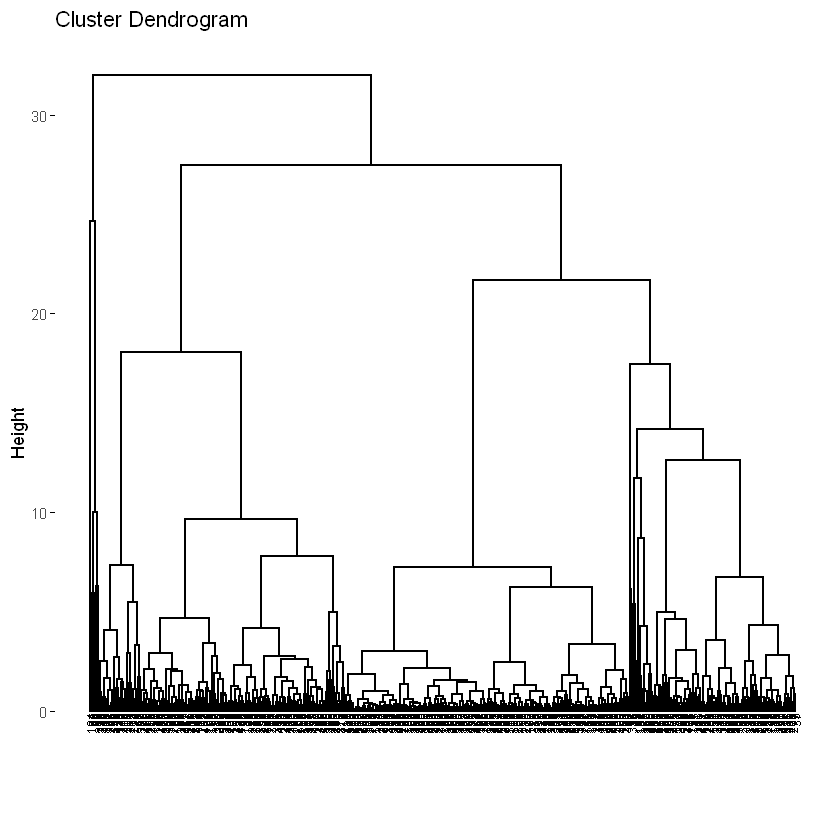

In [44]:
# Plotando dendograma
fviz_dend(cluster, cex = 0.5)

In [45]:
# Reduzindo número de segmentos para k=4
cluster_k4<- cutree(cluster,k=4)

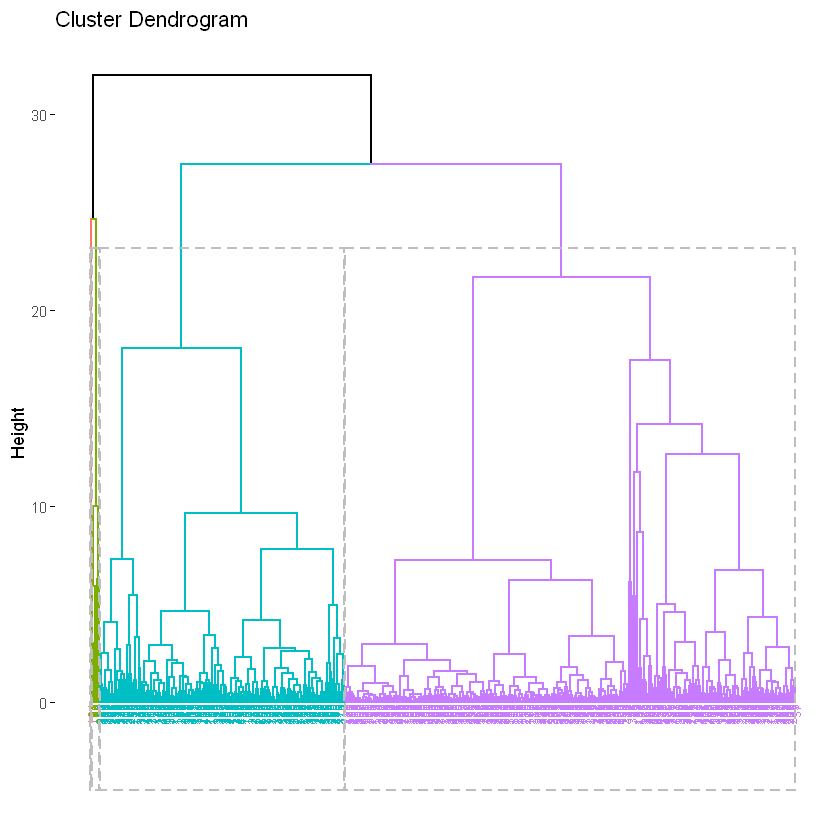

In [46]:
# Plotando dendograma k=4
fviz_dend(cluster, cex = 0.5, k = 4, color_labels_by_k = TRUE,rect = TRUE)

In [47]:
# Tabela de frequência k=4
table<-table(cluster_k4)
kable(table,caption="Frequência k=4")



Table: Frequência k=4

|cluster_k4 | Freq|
|:----------|----:|
|1          |  153|
|2          |  281|
|3          |    5|
|4          |    1|

* A presença de outliers leva a formação de clusters com poucos observações. O cluster 4 possui 1 única observação.
* Para resolver esse problema, iremos filtrar os dados para excluir gastos maiores de 45 mil.

In [48]:
# Filtrando os dados
df3<- df2 %>%
filter(Frescos<45000 & Lacteos <45000 & Mercearia<45000 & Congelados <45000 & Limpeza <45000 & Delicatessen<45000)

In [49]:
# Padronizando as variáveis
df3_scaled<- scale(df3)

In [50]:
# Calculando distância
distancia2<- dist(df3_scaled)

In [51]:
# Clustering
cluster2<- hclust(distancia2,method="ward.D2")

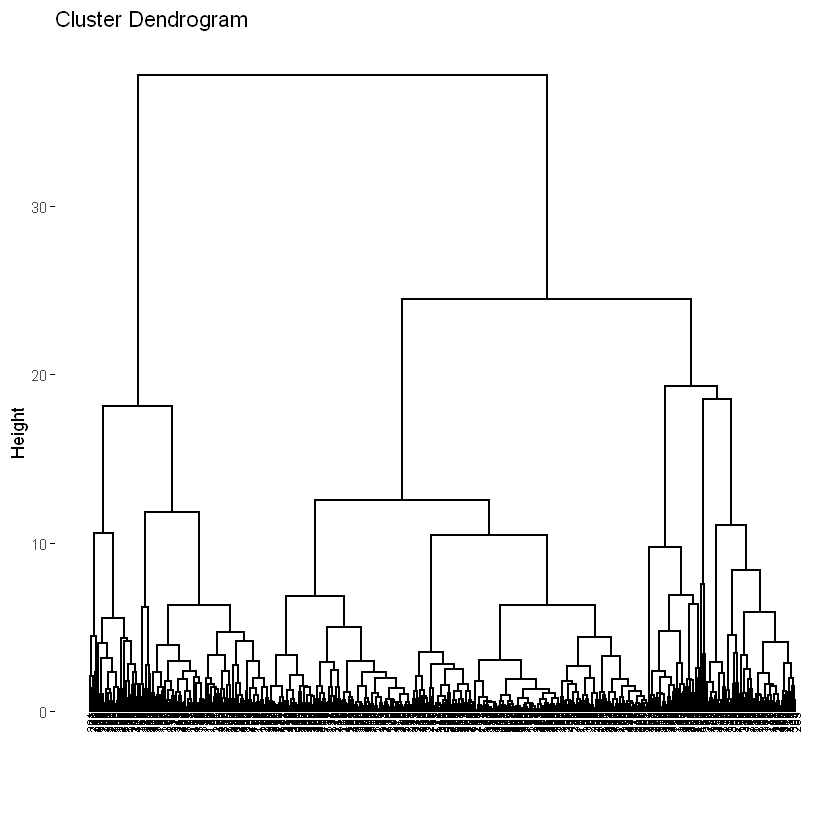

In [52]:
# Plotando dendograma
fviz_dend(cluster2, cex = 0.5)

In [53]:
# Reduzindo número de segmentos para k=4
cluster2_k4<- cutree(cluster2,k=4)

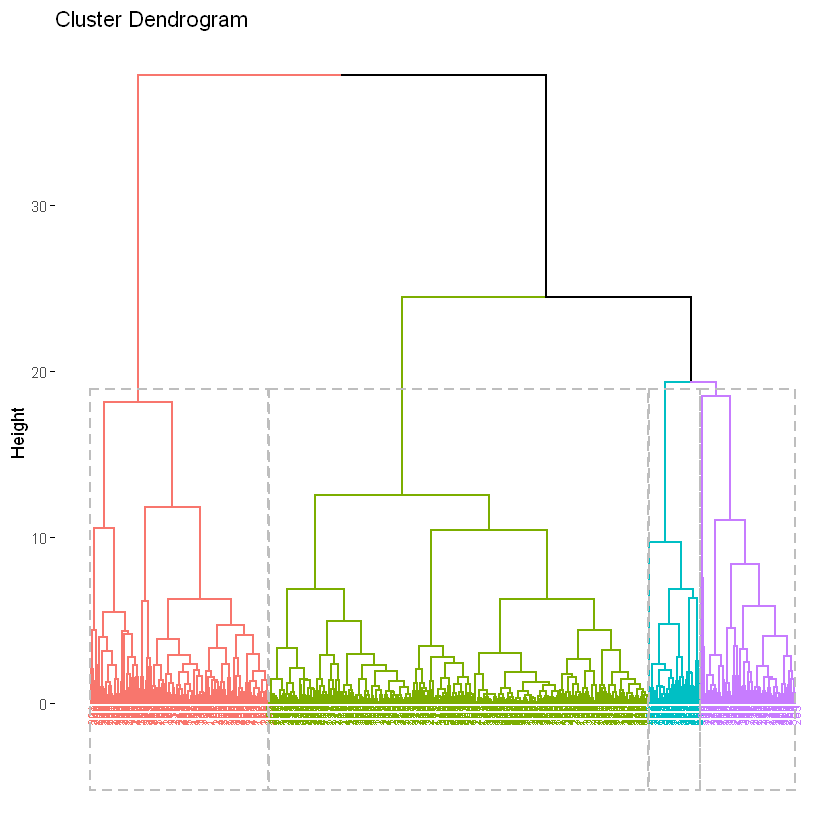

In [54]:
# Plotando dendograma k=4
fviz_dend(cluster2, cex = 0.5, k = 4, color_labels_by_k = TRUE,rect = TRUE)

In [55]:
# Tabela de frequência
table<-table(cluster2_k4)
kable(table,caption="Frequência k=4 c/filtro")



Table: Frequência k=4 c/filtro

|cluster2_k4 | Freq|
|:-----------|----:|
|1           |  227|
|2           |  107|
|3           |   57|
|4           |   31|

In [76]:
# Inserir coluna com cluster
df3$cluster<- factor(cluster2_k4,labels=c("Cluster 1","Cluster 2","Cluster 3","Cluster 4"))

In [75]:
df3<-df3[,-7]

* Com a divisão em segmentos podemos visualizar cada observação com seu referido grupo

In [77]:
# Visualizar as seis primeiras linhas do dataset com clusters
head(df3)

Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen,cluster
12669,9656,7561,214,2674,1338,Cluster 1
7057,9810,9568,1762,3293,1776,Cluster 2
6353,8808,7684,2405,3516,7844,Cluster 3
13265,1196,4221,6404,507,1788,Cluster 1
22615,5410,7198,3915,1777,5185,Cluster 3
9413,8259,5126,666,1795,1451,Cluster 1


* Podemos visualizar o gasto médio, mediana e o total de gasto por cluster.
* Isso pode ser usado pela equipe de vendas, marketing, etc.

In [78]:
# Perfil de cada segmento pela média
aggregate(df3[,-7],by=list(cluster2_k4),mean)

Group.1,Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen
1,8865.454,2472.634,3278.683,2099.097,810.3921,722.489
2,5025.402,10888.832,16325.421,1649.000,7252.1869,1605.103
3,23772.105,5731.842,7371.123,2171.000,1781.2281,3280.333
4,17942.484,4311.968,4149.935,11816.968,564.6452,1754.194


In [99]:
# Perfil de cada segmento pela mediana
aggregate(df3[,-7],by=list(cluster2_k4),median)

Group.1,Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen
1,7588,1825,2475,1389,375,610
2,4389,9540,14403,1069,6740,1393
3,22321,4786,6550,1718,1107,2503
4,17023,3575,3202,9927,385,1498


In [59]:
# Perfil de cada segmento pela soma
aggregate(df3[,-7],by=list(cluster2_k4),sum)

Group.1,Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen
1,2012458,561288,744261,476495,183959,164005
2,537718,1165105,1746820,176443,775984,171746
3,1355010,326715,420154,123747,101530,186979
4,556217,133671,128648,366326,17504,54380


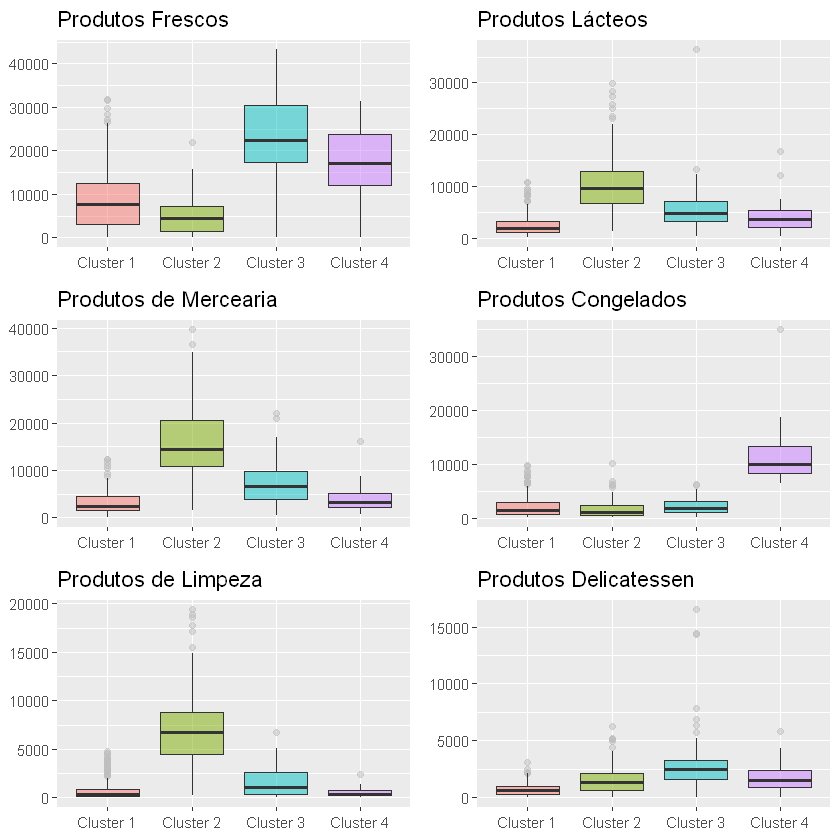

In [98]:
# Plotando tipo de produto por cluster
p<- geom_boxplot(aes(fill=cluster),alpha=0.5,show.legend=F,outlier.color="grey")
a<-df3 %>%
ggplot(aes(cluster,Frescos)) + p + labs(title="Produtos Frescos",y=NULL,x=NULL)
b<-df3 %>%
ggplot(aes(cluster,Lacteos)) + p + labs(title="Produtos Lácteos",y=NULL,x=NULL)
c<-df3 %>%
ggplot(aes(cluster,Mercearia)) + p + labs(title="Produtos de Mercearia",y=NULL,x=NULL)
d<-df3 %>%
ggplot(aes(cluster,Congelados)) + p + labs(title="Produtos Congelados",y=NULL,x=NULL)
e<-df3 %>%
ggplot(aes(cluster,Limpeza)) + p + labs(title="Produtos de Limpeza",y=NULL,x=NULL)
f<-df3 %>%
ggplot(aes(cluster,Delicatessen)) + p + labs(title="Produtos Delicatessen",y=NULL,x=NULL)
grid.arrange(a,b,c,d,e,f,ncol=2)

### 6.2 Segmentação Por Atividade

* Iremos realizar a segmentação a partir da "temperatura" do cliente, segundo o tempo decorrido desde a última compra.
* Dividiremos em quatro grupos, que correspondem à compras mais de três anos, entre dois e três anos, entre um e dois anos, e compras nos últimos 365 dias. Respectivamente, clientes inativos, frio, quente e ativos.

In [100]:
# Novo Data.frame
df4<- df

In [103]:
# Criando segmentação
df4$Segmento<- "NA"
df4$Segmento[which(df4$Dias_decorridos > 1095)]<- "Inativo"
df4$Segmento[which(df4$Dias_decorridos <= 1095 & df4$Dias_decorridos > 730)]<- "Frio"
df4$Segmento[which(df4$Dias_decorridos <= 730 & df4$Dias_decorridos > 365)]<- "Quente"
df4$Segmento[which(df4$Dias_decorridos <= 365)]<- "Ativo"                 

In [113]:
# Transformando a variável segmentação em factor
df4$Segmento<- factor(df4$Segmento,levels=c("Inativo","Frio","Quente","Ativo"))

In [115]:
# Contagem dos segmentos
table(df4$Segmento)


Inativo    Frio  Quente   Ativo 
    171      95      97      77 

In [116]:
# Visualizando as seis primeiras linhas do dataset com segmentos
head(df4)

Canal,Regiao,Frescos,Lacteos,Mercearia,Congelados,Limpeza,Delicatessen,Data,Ano,Dias_decorridos,Segmento
2,3,12669,9656,7561,214,2674,1338,2018-11-08,2018,419.0833,Quente
2,3,7057,9810,9568,1762,3293,1776,2019-04-02,2019,274.0833,Ativo
2,3,6353,8808,7684,2405,3516,7844,2017-05-28,2017,948.0833,Frio
1,3,13265,1196,4221,6404,507,1788,2017-10-28,2017,795.0833,Frio
2,3,22615,5410,7198,3915,1777,5185,2016-06-28,2016,1282.0833,Inativo
2,3,9413,8259,5126,666,1795,1451,2016-09-17,2016,1201.0833,Inativo


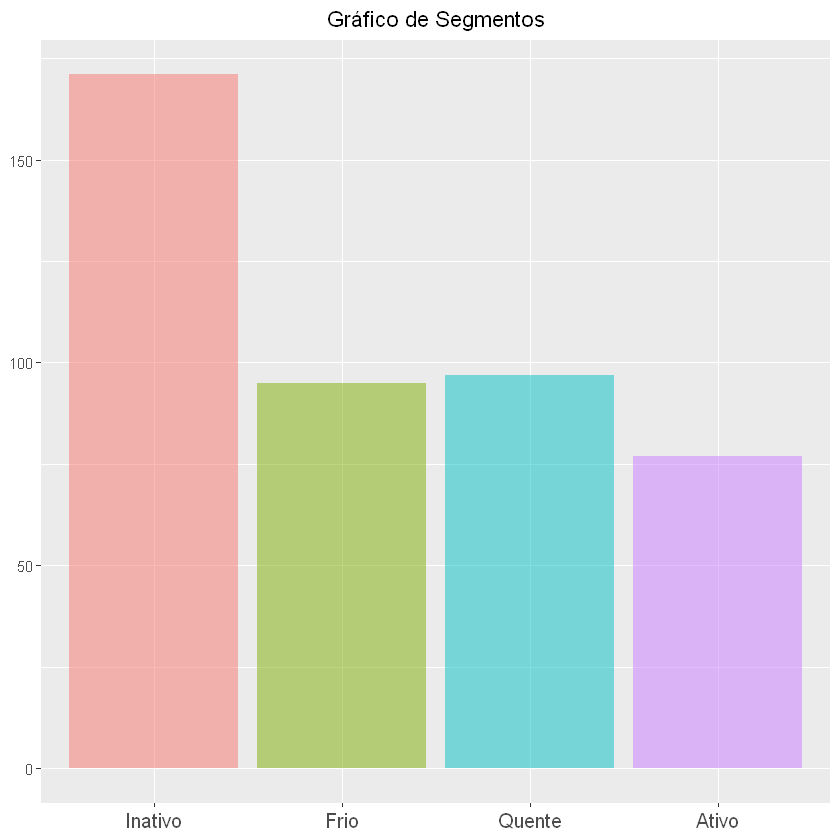

In [117]:
# Plotando segmentos
df4 %>%
ggplot(aes(Segmento,fill=Segmento)) +
geom_bar(alpha=.5,show.legend=F) +
labs(x=NULL,y=NULL,title="Gráfico de Segmentos") +
theme(plot.title = element_text(hjust = 0.5),
     axis.text.x=element_text(size=12))

* Calculando media e mediana por tipo de produto em cada segmento

In [124]:
# Calculando média de gastos por segmento
segmentos_media<-aggregate(df4[,3:8],by=list(df4$Segmento), mean)
kable(segmentos,caption="Média de Gastos por Segmento ")



Table: Média de Gastos por Segmento 

|Group.1 |   Frescos|  Lacteos| Mercearia| Congelados|  Limpeza| Delicatessen|
|:-------|---------:|--------:|---------:|----------:|--------:|------------:|
|Inativo | 11917.327| 6193.807|  7949.193|   3157.702| 2866.193|     1774.234|
|Frio    | 14320.189| 3833.905|  5949.105|   2750.895| 2227.042|     1330.295|
|Quente  | 11728.320| 7377.907| 10105.753|   3313.577| 3787.392|     1566.206|
|Ativo   |  9664.974| 5342.052|  7712.039|   2973.130| 2581.714|     1159.078|

In [120]:
# Calculando mediana de gastos por segmento
segmentos_mediana<-aggregate(df4[,3:8],by=list(df4$Segmento), median)
kable(segmentos,caption="Mediana de Gastos por Segmento ")



Table: Mediana de Gastos por Segmento 

|Group.1 | Frescos| Lacteos| Mercearia| Congelados| Limpeza| Delicatessen|
|:-------|-------:|-------:|---------:|----------:|-------:|------------:|
|Inativo |    9198|    3838|      4945|       1691|     788|          960|
|Frio    |   10253|    2616|      3600|       1420|     716|          860|
|Quente  |    7149|    4332|      6964|       1206|    1135|         1063|
|Ativo   |    6300|    3154|      5109|       1762|     821|          750|

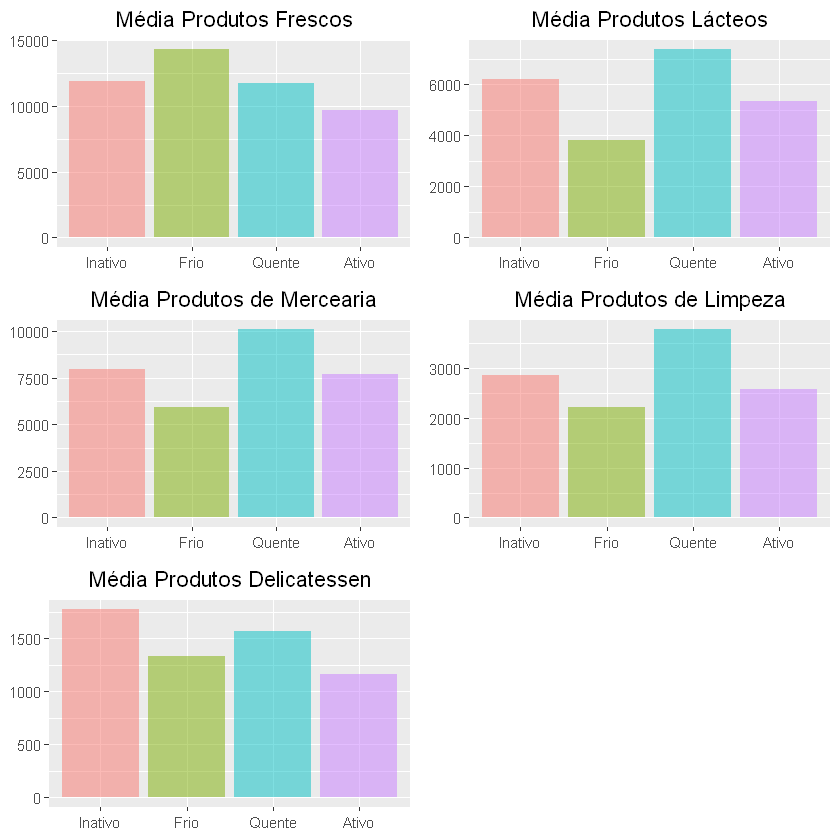

In [127]:
# Plotando média de gastos por segmento
g<-geom_col(alpha=.5,show.legend=F) 
t<-theme(plot.title = element_text(hjust = 0.5))
g1<-ggplot(segmentos_media,aes(Group.1,Frescos,fill=Group.1)) + g + t +
labs(x=NULL,y=NULL,title="Média Produtos Frescos")
g2<-ggplot(segmentos_media,aes(Group.1,Lacteos,fill=Group.1)) + g + t +
labs(x=NULL,y=NULL,title="Média Produtos Lácteos")
g3<-ggplot(segmentos_media,aes(Group.1,Mercearia,fill=Group.1)) + g + t +
labs(x=NULL,y=NULL,title="Média Produtos de Mercearia")
g4<-ggplot(segmentos_media,aes(Group.1,Limpeza,fill=Group.1)) + g + t + 
labs(x=NULL,y=NULL,title="Média Produtos de Limpeza")
g5<-ggplot(segmentos_media,aes(Group.1,Delicatessen,fill=Group.1)) + g + t +
labs(x=NULL,y=NULL,title="Média Produtos Delicatessen")
grid.arrange(g1,g2,g3,g4,g5)